In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import scipy as sp
from collections import defaultdict
from itertools import product
import gurobipy as gb
from gurobipy import GRB
from tqdm import tqdm

In [2]:
loops = json.load(open('./loops.json'))
locations = pd.read_json('../cleandata/locations.json')

In [3]:
longs = locations['long'].to_numpy()
lats = locations['lat'].to_numpy()
longs_lats_in_one = np.array([*zip(longs[:125],lats[:125])])
def get_loc(i):
    if i == 125:
        i = 8
    elif i == 126:
        i = 11
    return longs_lats_in_one[i]

Text(0, 0.5, 'Latitude')

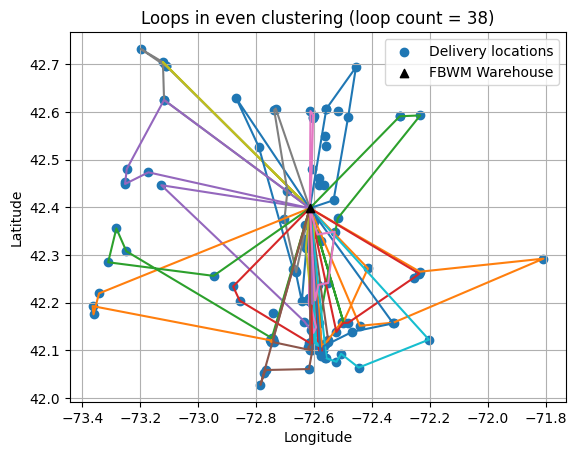

In [4]:
for loop in loops:
    '''paths = []
    for i in range(0,len(loop) - 1):
        paths.append((loop[i], loop[i+1]))'''
    locs = list(map(lambda loc:get_loc(loc)[0], loop)), list(map(lambda loc:get_loc(loc)[1], loop))
    plt.plot(locs[0], locs[1])
plt.grid()
plt.scatter(longs, lats, label='Delivery locations')
plt.scatter(longs[0], lats[0], marker='^', color='black', zorder = 5, label='FBWM Warehouse')
plt.title('Loops in even clustering (loop count = 38)')
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [34]:
from itertools import chain
ch = list(chain(*loops))
ch.sort()
for i in range(54):
    ch.remove(0)

In [37]:
ch == list(range(1, 127))

True

In [38]:
loops

[[0, 1, 45, 46, 44, 101, 0],
 [0, 93, 2, 66, 123, 0],
 [0, 105, 49, 61, 60, 3, 0],
 [0, 106, 115, 26, 4, 113, 0],
 [0, 25, 92, 85, 111, 5, 0],
 [0, 69, 6, 35, 108, 33, 0],
 [0, 102, 47, 7, 16, 48, 0],
 [0, 72, 98, 27, 8, 71, 0],
 [0, 125, 0],
 [0, 43, 9, 32, 107, 78, 0],
 [0, 57, 10, 21, 122, 104, 0],
 [0, 120, 84, 75, 11, 51, 0],
 [0, 126, 0],
 [0, 31, 110, 81, 88, 12, 0],
 [0, 97, 13, 74, 20, 99, 0],
 [0, 29, 53, 54, 94, 14, 0],
 [0, 15, 24, 82, 79, 117, 0],
 [0, 17, 56, 63, 62, 55, 0],
 [0, 59, 18, 38, 116, 50, 0],
 [0, 89, 95, 103, 19, 87, 0],
 [0, 86, 28, 40, 119, 22, 0],
 [0, 121, 91, 23, 76, 100, 0],
 [0, 30, 90, 80, 83, 65, 0],
 [0, 64, 70, 118, 77, 34, 0],
 [0, 41, 109, 37, 36, 114, 0],
 [0, 39, 52, 42, 96, 73, 0],
 [0, 58, 124, 68, 67, 112, 0]]